# 3. **Elasticidad del Precio**
**Resumen:** El análisis de elasticidad precio-demanda permite evaluar cómo los cambios en los precios afectan la demanda de aguacates. Comprender la elasticidad puede ayudar a formular estrategias de precios más efectivas.

La fórmula de elasticidad precio-demanda es:

$$
E_d = \frac{\% \text{Cambio en la cantidad demandada}}{\% \text{Cambio en el precio}} = \frac{\Delta Q / Q}{\Delta P / P}
$$

## 1. **Elasticidad Precio-Demanda por Año:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda para cada año.
     - Calcula la variación porcentual de `Total Volume` y `AveragePrice` utilizando `pd.pct_change()`.
     - Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
     - Presenta los resultados en un gráfico de líneas usando `plt.plot()` para mostrar la elasticidad por año.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("avocado.csv")
df_cp = df.copy()
df_cp['Date'] = pd.to_datetime(df_cp['Date'])

Descibiendo el problema, al calcular la elasticidad no solo aparece un nan al inicio (Que es lo de menos), sino que aparecen infinitos y menos infinitos que hay que tratar

In [23]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by='year')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Elasticity'] = df_cp_elast_year['Total Volume'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_year_sorted =df_cp_elast_year[-df_cp_elast_year['Elasticity'].isin([-np.inf,np.inf])]



Text(0.5, 1.0, 'Sorted year elasticity')

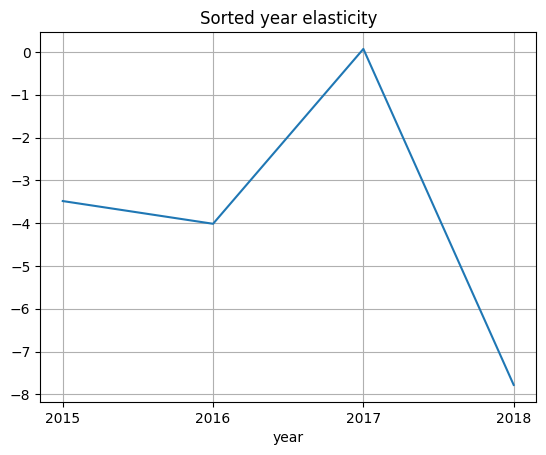

In [25]:
# Creem el group by adient
yearly_elasticity_sort = df_cp_elast_year_sorted.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity_sort.index)
ax.grid()
plt.title('Sorted year elasticity')

In [26]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast['Elasticity'] = df_cp_elast['Total Volume'].pct_change() /  df_cp_elast['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_clean =df_cp_elast[-df_cp_elast['Elasticity'].isin([-np.inf,np.inf])]


Text(0.5, 1.0, 'Non sorted yearly elasticity')

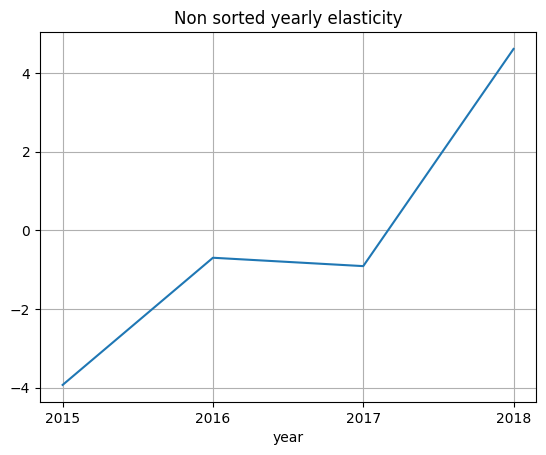

In [28]:
# Creem el group by adient
yearly_elasticity = df_cp_elast_clean.loc[1:,:].groupby("year").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
yearly_elasticity.loc[:,'Elasticity'].plot(kind = 'line',ax= ax )
ax.set_xticks(yearly_elasticity.index)
ax.grid()
plt.title('Non sorted yearly elasticity')


## 2. **Comparación de Elasticidad en Diferentes Mercados:**
   - **Uso de Datos:** Utiliza las columnas `Total Volume` y `AveragePrice`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda en diferentes regiones.
     - Agrupa los datos por `region` y calcula la elasticidad para cada región utilizando `pd.pct_change()`.
     - Presenta un gráfico de barras que muestre la elasticidad por región usando `plt.bar()`.

### 2. Sorted

In [29]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_region = df_cp_elast.sort_values(by='region')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_region['Elasticity'] = df_cp_elast_region['Total Volume'].pct_change() /  df_cp_elast_region['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_region_sorted =df_cp_elast_region[-df_cp_elast_region['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted region elasticity')

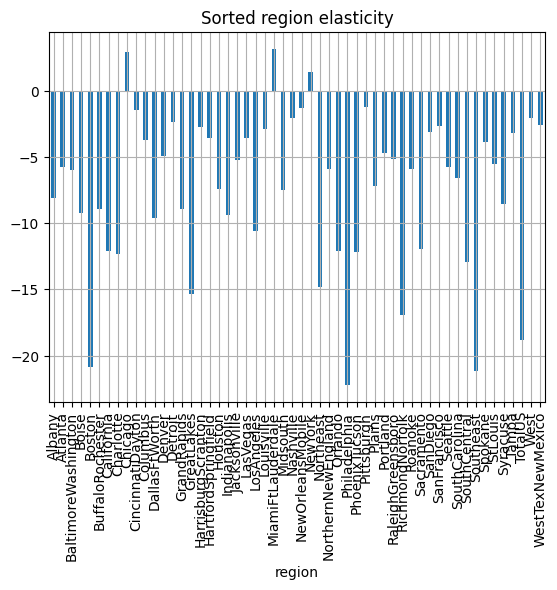

In [32]:
# Creem el group by adient
region_elasticity_sort = df_cp_elast_region_sorted.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax )
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted region elasticity')

### 2. Non Sorted

Text(0.5, 1.0, 'Non sorted region elasticity')

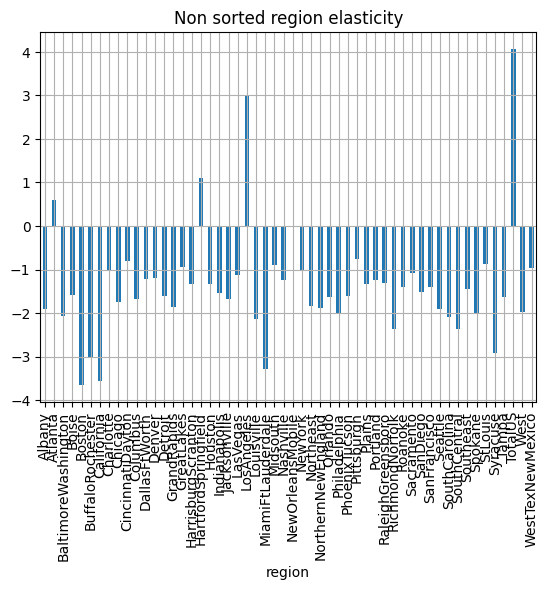

In [34]:
# Creem el group by adient
region_elasticity = df_cp_elast_clean.loc[1:,:].groupby("region").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
region_elasticity.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax )
ax.grid()
plt.title('Non sorted region elasticity')



## 3. **Elasticidad a Nivel de Tipo de Bolsa:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Bags`.
   - **Esperado:** Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `groupby()` y `sum()`.
     - Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando `plt.bar()`.

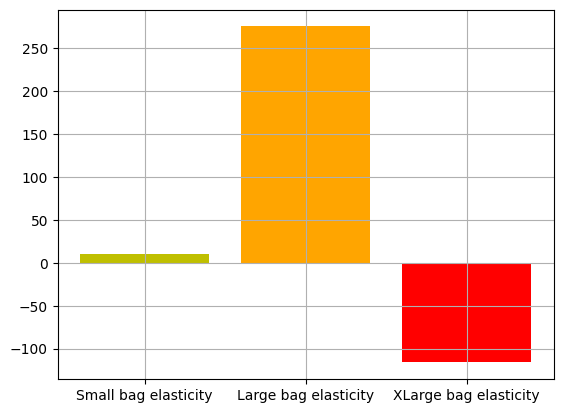

In [67]:
df_cp.head()
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast_bags = df_cp.copy()

df_cp_elast_bags['Small bag elasticity']= df_cp_elast_year['Small Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()
df_cp_elast_bags['Large bag elasticity']= df_cp_elast_year['Large Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()
df_cp_elast_bags['XLarge bag elasticity']= df_cp_elast_year['XLarge Bags'].pct_change() /  df_cp_elast_year['AveragePrice'].pct_change()

df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Small bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['Large bag elasticity'].isin([-np.inf,np.inf])]
df_cp_elast_bags =df_cp_elast_bags[-df_cp_elast_bags['XLarge bag elasticity'].isin([-np.inf,np.inf])]

bag_means = df_cp_elast_bags.loc[1:,['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']].mean()

labels= ['Small bag elasticity','Large bag elasticity','XLarge bag elasticity']

plt.bar(x=labels, height = bag_means, color = ('y', 'orange', 'r'))
plt.grid()

## 4. **Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Total Volume` y `type`.
   - **Esperado:** Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
     - Agrupa los datos por `type` y calcula la elasticidad utilizando `pd.pct_change()`.
     - Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando `plt.bar()`.

### 4. Sorted

In [35]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_type = df_cp_elast.sort_values(by='type')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_type['Elasticity'] = df_cp_elast_type['Total Volume'].pct_change() /  df_cp_elast_type['AveragePrice'].pct_change()

# Els possibles valors entre infinit i menys infinit son ignorats per a un subset net
df_cp_elast_type_sorted =df_cp_elast_type[-df_cp_elast_type['Elasticity'].isin([-np.inf,np.inf])]

Text(0.5, 1.0, 'Sorted type elasticity')

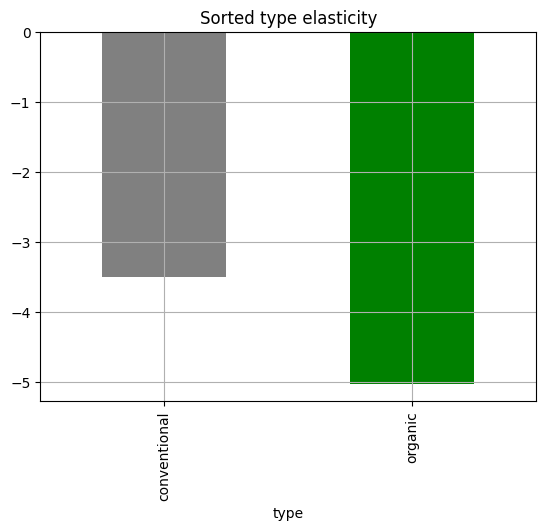

In [44]:
# Creem el group by adient
type_elasticity_sort = df_cp_elast_type_sorted.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity_sort.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
# ax.set_xticks(region_elasticity_sort.index)
ax.grid()
plt.title('Sorted type elasticity')

### 4. Non Sorted

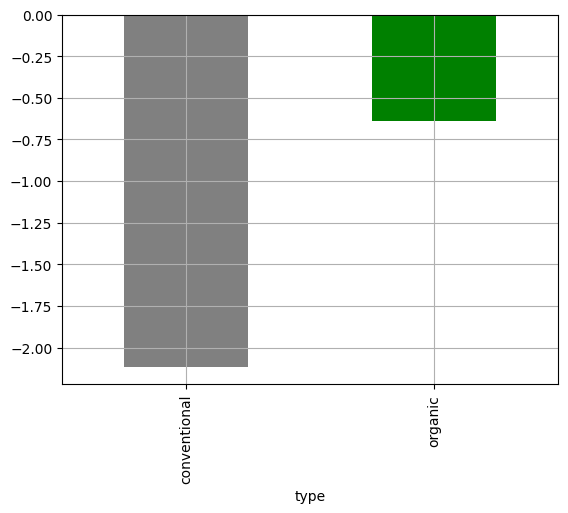

In [49]:
# Creem el group by adient
type_elasticity = df_cp_elast_clean.loc[1:,:].groupby("type").agg({'Elasticity':"mean"})

#Plotejem
fig, ax = plt.subplots()
type_elasticity.loc[:,'Elasticity'].plot(kind = 'bar',ax= ax, color = ['gray','green'])
ax.grid()

## 5. **Análisis de la Elasticidad Precios-Ventas:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `Total Volume`.
   - **Esperado:** Examina cómo las variaciones en `AveragePrice` afectan a `Total Volume`.
     - Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
     - Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando `plt.scatter()` y `plt.plot()`.

### 5. Sorted

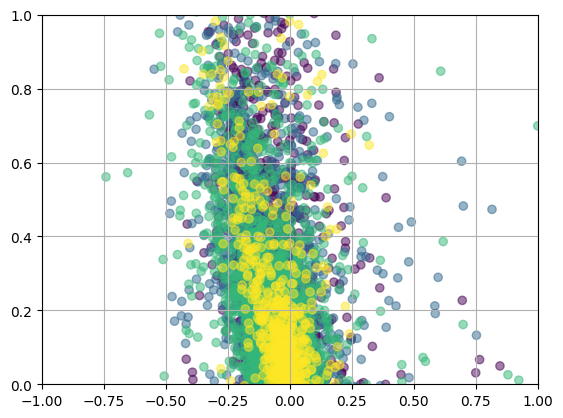

In [48]:
# Creacion de la variable elasticidad y eliminacion de valores no utiles
df_cp_elast = df_cp.copy()

# Sort by year, asi la elasticidad se calcula entre los valores del mismo grupo
df_cp_elast_year = df_cp_elast.sort_values(by='year')

# Creem la variable elasticity per cada mesura y setejem el primer valor a 0
df_cp_elast_year['Variation Total Volume'] = df_cp_elast_year['Total Volume'].pct_change()   
df_cp_elast_year['Variation AveragePrice'] = df_cp_elast_year['AveragePrice'].pct_change()

y_values= df_cp_elast_year.loc[1:,'Variation Total Volume']
x_values= df_cp_elast_year.loc[1:,'Variation AveragePrice']
z_values= df_cp_elast_year.loc[1:,'year']

fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(0,1)
plt.xlim(-1,1)
ax.grid()


### 5. Non-Sorted

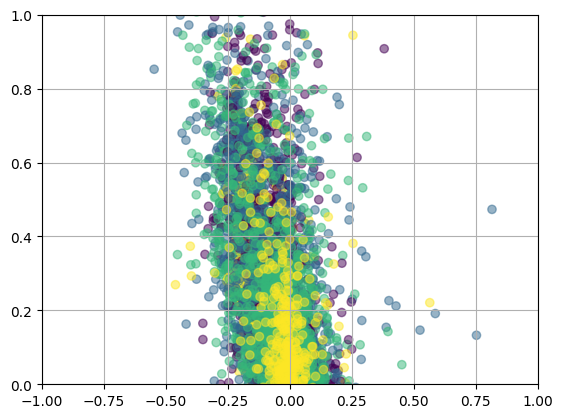

In [256]:
df_cp_elast['Variation Total Volume'] = df_cp_elast['Total Volume'].pct_change()   
df_cp_elast['Variation AveragePrice'] = df_cp_elast['AveragePrice'].pct_change()

coloring_alcovados = {'conventional': 'gray', 'organic': 'green'}

y_values= df_cp_elast.loc[1:,'Variation Total Volume']
x_values= df_cp_elast.loc[1:,'Variation AveragePrice']
z_values= df_cp_elast.loc[1:,'year']

fig, ax = plt.subplots( )
ax.scatter(x=x_values,y= y_values, c=z_values, alpha=0.5)#.map(coloring_alcovados)
plt.ylim(0,1)
plt.xlim(-1,1)
ax.grid()

